## Machine Learning Project on Data Professional Job Market ---Jan. 2020

### Author: Jennifer Lawless & Jie Bai

In [1]:
# Import all the required packages
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import sklearn
import urllib
import requests
import sys
import nltk
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup as Soup
from tqdm import tqdm
from furl import furl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm

In [2]:
#Loading the data
df = pd.read_csv('Resources/indeed_job_dataset.csv')
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 6')
#df = df[['Job_Type','Queried_Salary','No_of_Skills','Company','Company_Industry','Location']].copy()
print(df.dtypes)
print(df.shape)
df.head()

Job_Title                            object
Link                                 object
Queried_Salary                       object
Job_Type                             object
Skill                                object
No_of_Skills                        float64
Company                              object
No_of_Reviews                       float64
No_of_Stars                         float64
Date_Since_Posted                   float64
Description                          object
Location                             object
Company_Revenue                      object
Company_Employees                    object
Company_Industry                     object
python                              float64
sql                                 float64
machine learning                    float64
r                                   float64
hadoop                              float64
tableau                             float64
sas                                 float64
spark                           

,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"SAP, SQL",2.0,Express Scripts,3301.0,3.3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"Machine Learning, R, SAS, SQL, Python",5.0,Money Mart Financial Services,NaN,NaN,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"Data Mining, Data Management, R, SAS, SQL, STA...",9.0,comScore,62.0,3.5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,Certified Internal Auditor,1.0,Central Intelligence Agency,158.0,4.3,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"Statistical Software, Time Management, R, Micr...",7.0,Federal Reserve Bank of Dallas,495.0,4.1,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Part1: Some Data Analysis

In [3]:
industry_clean = df.dropna(subset=['Company_Industry'])

In [4]:
industry = str(industry_clean.Company_Industry)
industry

'0                        Health Care\n3                         Government\n4       Banks and Financial Services\n6                         Government\n8              Education and Schools\n                    ...             \n5708    Human Resources and Staffing\n5711    Human Resources and Staffing\n5712    Banks and Financial Services\n5713    Banks and Financial Services\n5714           Aerospace and Defense\nName: Company_Industry, Length: 3826, dtype: object'

In [5]:
ind = pd.DataFrame(industry_clean.Company_Industry)
ind.head()

,Company_Industry
0,Health Care
3,Government
4,Banks and Financial Services
6,Government
8,Education and Schools


In [6]:
ind['Company_Industry'].value_counts()

Consulting and Business Services                                   733
Internet and Software                                              647
Banks and Financial Services                                       459
Health Care                                                        339
Insurance                                                          227
Industrial Manufacturing                                           153
Aerospace and Defense                                              129
Retail                                                             122
Education and Schools                                              121
Computers and Electronics                                           99
Consumer Goods and Services                                         98
Media, News and Publishing                                          96
Telecommunications                                                  73
Human Resources and Staffing                                        73
Govern

In [7]:
len(ind['Company_Industry'].unique())

33

In [8]:
industry1 = str(ind)

In [9]:
print(len(industry1))

444


In [10]:
import re
output = re.sub(r'\d+', '', industry1)
print(output)

                  Company_Industry
                      Health Care
                       Government
     Banks and Financial Services
                       Government
            Education and Schools
...                            ...
  Human Resources and Staffing
  Human Resources and Staffing
  Banks and Financial Services
  Banks and Financial Services
         Aerospace and Defense

[ rows x  columns]


In [11]:
nltk.download('popular')
from nltk.probability import FreqDist

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading

In [12]:
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [13]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(output)
tokens

['Company_Industry',
 'Health',
 'Care',
 'Government',
 'Banks',
 'and',
 'Financial',
 'Services',
 'Government',
 'Education',
 'and',
 'Schools',
 'Human',
 'Resources',
 'and',
 'Staffing',
 'Human',
 'Resources',
 'and',
 'Staffing',
 'Banks',
 'and',
 'Financial',
 'Services',
 'Banks',
 'and',
 'Financial',
 'Services',
 'Aerospace',
 'and',
 'Defense',
 'rows',
 'x',
 'columns']

In [14]:
tokens_str = str(tokens)

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words('english')+ list(punctuation))
word_tokens = word_tokenize(tokens_str)
filtered_words = [w for w in word_tokens if not w in stopwords]
filtered_words = []
for w in word_tokens:
    if w not in stopwords:
        filtered_words.append(w)
print(filtered_words)

["'Company_Industry", "'Health", "'Care", "'Government", "'Banks", "'and", "'Financial", "'Services", "'Government", "'Education", "'and", "'Schools", "'Human", "'Resources", "'and", "'Staffing", "'Human", "'Resources", "'and", "'Staffing", "'Banks", "'and", "'Financial", "'Services", "'Banks", "'and", "'Financial", "'Services", "'Aerospace", "'and", "'Defense", "'rows", 'x', "'columns"]


In [16]:
from collections import Counter
word_frequency = Counter(filtered_words)
print("Vector of frequencies:\n {}".format(list(word_frequency.values())))
print("Corresponding words:\n {}".format(list(word_frequency.keys())))

Vector of frequencies:
 [1, 1, 1, 2, 3, 7, 3, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Corresponding words:
 ["'Company_Industry", "'Health", "'Care", "'Government", "'Banks", "'and", "'Financial", "'Services", "'Education", "'Schools", "'Human", "'Resources", "'Staffing", "'Aerospace", "'Defense", "'rows", 'x', "'columns"]


In [17]:
word_frequency

Counter({"'Company_Industry": 1,
         "'Health": 1,
         "'Care": 1,
         "'Government": 2,
         "'Banks": 3,
         "'and": 7,
         "'Financial": 3,
         "'Services": 3,
         "'Education": 1,
         "'Schools": 1,
         "'Human": 2,
         "'Resources": 2,
         "'Staffing": 2,
         "'Aerospace": 1,
         "'Defense": 1,
         "'rows": 1,
         'x': 1,
         "'columns": 1})

In [18]:
fdist1 = FreqDist(word_frequency)
print(fdist1)

<FreqDist with 18 samples and 34 outcomes>


In [19]:
fdist1

FreqDist({"'and": 7, "'Banks": 3, "'Financial": 3, "'Services": 3, "'Government": 2, "'Human": 2, "'Resources": 2, "'Staffing": 2, "'Company_Industry": 1, "'Health": 1, ...})

In [20]:
word_frequency.most_common(10)

[("'and", 7),
 ("'Banks", 3),
 ("'Financial", 3),
 ("'Services", 3),
 ("'Government", 2),
 ("'Human", 2),
 ("'Resources", 2),
 ("'Staffing", 2),
 ("'Company_Industry", 1),
 ("'Health", 1)]

In [21]:
print(stopwords)

{'some', 'to', 'such', 'll', "mustn't", 'that', 'for', 'if', 'doing', 'too', 'theirs', '(', 'who', 'being', 'o', 'there', 'wouldn', '>', 'hadn', 's', 'am', 'shouldn', '#', ')', 'down', 'from', 'be', "aren't", 'into', 'between', 'other', 'does', 'his', 'doesn', 'above', 'having', 'before', 'when', '\\', 'did', 'don', '@', 'nor', 'at', 'ours', 'my', 'yours', 'an', 'not', 'her', 'couldn', 'has', 'haven', 'needn', 'yourself', 'should', '*', 'mightn', 're', 'all', 'i', '-', 'your', 'the', 'its', 'or', '}', 'but', 't', 'these', 'whom', 'few', 'our', 'only', "should've", 'under', 'with', 'again', 'those', 'in', 'so', 'as', '"', '_', "needn't", 'were', 'each', 'hers', 'same', 'herself', "that'll", '|', 'been', 'can', 'of', "mightn't", '+', 'over', 'a', 'against', 'until', 'them', 'won', "shouldn't", 'had', 'they', "she's", 'himself', "you've", 'is', 'd', 'she', 'after', 'both', 'hasn', '&', 'because', "you're", 'while', 'do', 'ma', "you'll", 'y', 'their', 'during', 'didn', 'here', "it's", 'wer

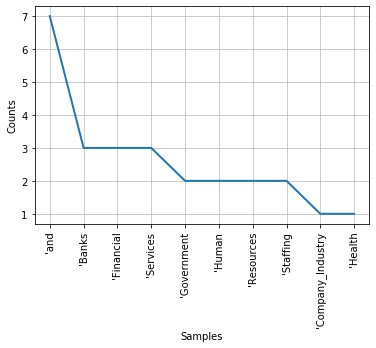

In [22]:
fdist1.plot(10)

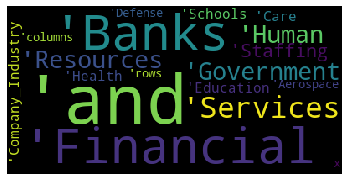

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(word_frequency)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
data_cleaning = df.replace({'Queried_Salary' : {'<80000': 80000, '80000-99999': 90000, '100000-119999': 110000, '120000-139999': 130000, '140000-159999': 150000, '>160000': 160000}}) 

In [25]:
data_clean = data_cleaning.dropna(subset=['Queried_Salary', 'Date_Since_Posted'])

In [26]:
data_clean.Queried_Salary.unique()

array([ 80000.,  90000., 110000., 130000., 150000., 160000.])

In [27]:
data_clean.Date_Since_Posted.unique()

array([ 1., 15., 30.,  5., 10., 22.,  6., 11., 21.,  2., 16., 18.,  3.,
        7.,  8.,  4., 14., 13., 28., 23., 19., 20., 12., 25., 29.,  9.,
       26., 27., 17., 24.])

In [28]:
y = data_clean["Queried_Salary"].values.reshape(-1,1)
X = data_clean[["Date_Since_Posted"]]
print(X.shape, y.shape)

(5611, 1) (5611, 1)


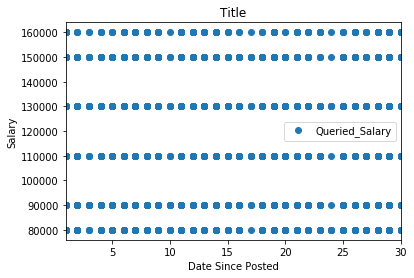

In [29]:
data_clean.plot(x='Date_Since_Posted', y='Queried_Salary', style='o')  
plt.title('Title')  
plt.xlabel('Date Since Posted')  
plt.ylabel('Salary')  
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008867996854932003
Testing Score: 0.007140896779794236


In [34]:
model.rank_

1

In [35]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[240.84578532]]
y-axis intercept:  [111328.9838754]


In [36]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [80000.]
Predicted output: [111569.82966072]
Prediction Error: [31569.82966072]


In [37]:
pd.DataFrame({"Predicted": [predictions], "Actual": [y], "Error": [predictions - y]})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,"[[111569.8296607192], [114941.67065513837], [1...","[[80000.0], [80000.0], [80000.0], [80000.0], [...","[[31569.829660719202], [34941.67065513837], [3..."


In [38]:
x_min = X.min()
x_max = X.max()

In [39]:
y_min_actual = y.min()
y_max_actual = y.max()

In [40]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 80000.0
Calculated Min Value: Date_Since_Posted    114.336249
dtype: float64
Actual Max Value: 160000.0
Calculated Max Value: Date_Since_Posted    475.096952
dtype: float64


In [41]:
y_min_predicted = model.predict(np.array(x_min).reshape(-1,1))
y_max_predicted = model.predict(np.array(x_max).reshape(-1,1))
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 80000.0
Predicted Min Value: [[111569.82966072]]
Actual Max Value: 160000.0
Predicted Max Value: [[118554.35743487]]


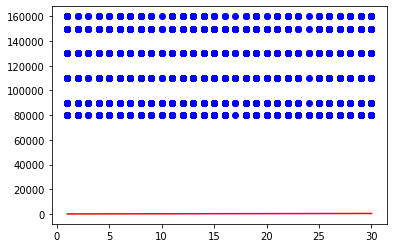

In [42]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
class PandasDummies(BaseEstimator, TransformerMixin):
    def transform(self, X, *_):
        return pd.get_dummies(X)
    
    def fit(self, *_):
        return self

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
model = make_pipeline(PandasDummies(), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pandasdummies', PandasDummies()),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [47]:
model.steps

[('pandasdummies', PandasDummies()),
 ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

In [48]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [49]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 639218773.747075, R2: 0.007140896779794236


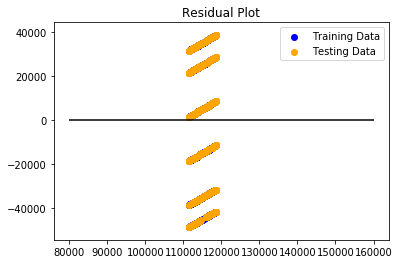

In [50]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

Toatl number of firms with data science job vacancies 2231
Top 10 firms with most vacancies                           Company  Job_Title
316           Booz Allen Hamilton        151
927                       Harnham         87
388                     Capgemini         84
752                      Facebook         65
1100                     KPMG LLP         64
2098                      Walmart         59
392                   Capital One         54
1067               JPMorgan Chase         51
883                        Google         40
994                           IBM         38
420                       Centene         37
55                      Accenture         36
1291                    Microsoft         36
1081           Jobspring Partners         35
107                      Allstate         35
833                    GE Careers         32
1992                         Uber         30
62               Ace Technologies         30
2099            Walmart eCommerce         30
82      

Text(0, 0.5, '# OF JOBS')

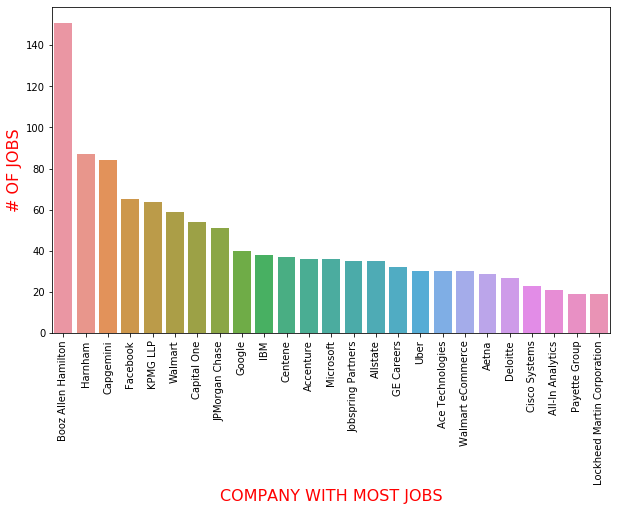

In [51]:
# finding total number of compnaies who require data science Professionals
total_no_company=df['Company'].nunique()
print('Toatl number of firms with data science job vacancies',total_no_company)

#finding highest number of vacancy in a company
most_vacancy= df.groupby(['Company'])['Job_Title'].count()
most_vacancy=most_vacancy.reset_index(name='Job_Title')
most_vacancy=most_vacancy.sort_values(['Job_Title'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="Company", y="Job_Title", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['Company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

Text(0.5, 0, 'Company Name')

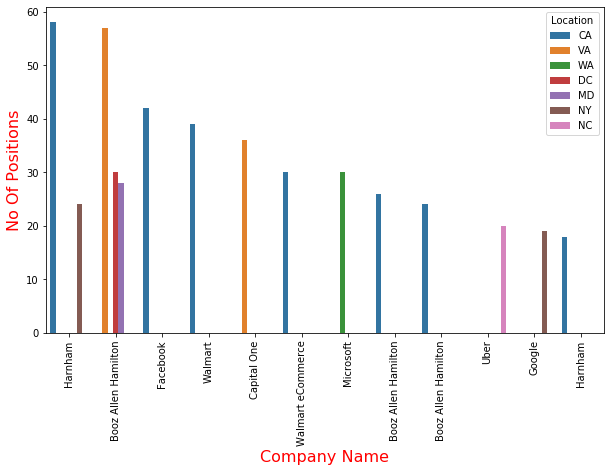

In [52]:
# Finding total number of states with Data science jobs
total_no_cities=df['Location'].nunique()

#states and total no of openings w.r.t companies
city_and_roles=df.groupby(['Location','Company'])['Job_Title'].count()     
city_and_roles=city_and_roles.reset_index()
city_and_roles=city_and_roles.sort_values(['Job_Title'],ascending=False)
city_and_roles=city_and_roles.head(15) 

# Plot graph for top most states and no of roles
fig,a=plt.subplots(figsize=(10,6))             
a=seaborn.barplot(x="Company", y="Job_Title", hue="Location", data=city_and_roles);    
a.set_xticklabels(city_and_roles['Company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red')

In [53]:
#PART 3 MACHINE LEARNING
#there are so many job profiles in the dataset so lets Categories them into 5: Data Scientist, 
#Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data=df.copy()
data.dropna(subset=['Job_Title'], how='all', inplace = True)
data.Job_Title=data.Job_Title.astype(str)
data.Description=data.Description.astype(str)
data['Job_Title']=[x.upper() for x in data['Job_Title']]
data['Description']=[x.upper() for x in data['Description']]

data.loc[data.Job_Title.str.contains("SCIENTIST"), 'Job_Title'] = 'Data Scientist'

data.loc[data.Job_Title.str.contains('ENGINEER'),'Job_Title']='Machine Learning Engineer'
data.loc[data.Job_Title.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'Job_Title']='Machine Learning Engineer'
data.loc[data.Job_Title.str.contains('PROGRAMMER'),'Job_Title']='Machine Learning Engineer'
data.loc[data.Job_Title.str.contains('DEVELOPER'),'Job_Title']='Machine Learning Engineer'

data.loc[data.Job_Title.str.contains('ANALYST'), 'Job_Title'] = 'Data Analyst'
data.loc[data.Job_Title.str.contains('STATISTICIAN'), 'Job_Title'] = 'Data Analyst'

data.loc[data.Job_Title.str.contains('MANAGER'),'Job_Title']='Data Science Manager'
data.loc[data.Job_Title.str.contains('CONSULTANT'),'Job_Title']='Data Science Manager'
data.loc[data.Job_Title.str.contains('DATA SCIENCE'),'Job_Title']='Data Science Manager'
data.loc[data.Job_Title.str.contains('DIRECTOR'),'Job_Title']='Data Science Manager'

data.Job_Title=data[(data.Job_Title == 'Data Scientist') | (data.Job_Title == 'Data Analyst') | (data.Job_Title == 'Machine Learning Engineer') | (data.Job_Title == 'Data Science Manager')]
data.Job_Title=['Others' if x is np.nan else x for x in data.Job_Title]

Job_Title=data.groupby(['Job_Title'])['Company'].count()   
Job_Title=Job_Title.reset_index(name='Company')
Job_Title=Job_Title.sort_values(['Company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', Job_Title)

Here is  the count of each new roles we created : 

                    Job_Title  Company
2             Data Scientist     2442
0               Data Analyst     1655
3  Machine Learning Engineer     1321
1       Data Science Manager      110
4                     Others       83


### Part2: Machine Learning(Predict the Job_Title with feature of job description)

In [54]:
# Next Part in ML Algorithm is Data Cleansing
X=data.Description
Y=data.Job_Title

X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)

#split the train and test sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [55]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))
print ('Confusion Matrix of NB : ', '\n\n', confusion_matrix(y_test,NB_y))

#crossfold Validation of 7 folds for NB
cross_val_NB=sklearn.model_selection.cross_validate(NB, x_train, y=y_train,cv=7,return_train_score=True)

print ('NB Train fit score is : ', '\n\n', cross_val_NB ['train_score'])
print ('NB TEST score is : ', '\n\n', cross_val_NB ['test_score'])

Accuracy of NB : 0.5580174927113702
Confusion Matrix of NB :  

 [[145   0 349   3   0]
 [  2   0  32   0   0]
 [  2   0 734   1   0]
 [  4   0 337  78   0]
 [  0   0  28   0   0]]
NB Train fit score is :  

 [0.5630105  0.56767795 0.56446908 0.56226305 0.57247011 0.5549723
 0.56022164]
NB TEST score is :  

 [0.54195804 0.52097902 0.51223776 0.51313485 0.52364273 0.5323993
 0.5323993 ]


In [56]:
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))

#crossfold Validation of 7 folds for SGD
cross_val_SGD=sklearn.model_selection.cross_validate(sgd, x_train, y=y_train,cv=7,return_train_score=True)

print ('SGD Train fit score is : ', '\n\n', cross_val_SGD ['train_score'])
print ('SGD TEST score is : ', '\n\n', cross_val_SGD ['test_score'])

Accuracy of SGD : 0.8606413994169096
Confusion Matrix of SGD :  

 [[415   0  65  17   0]
 [  7  10  15   2   0]
 [ 22   1 701  13   0]
 [ 28   0  50 341   0]
 [  3   1  15   0   9]]
SGD Train fit score is :  

 [0.94924154 0.95011669 0.94982497 0.94779819 0.93000875 0.93088364
 0.94838145]
SGD TEST score is :  

 [0.83741259 0.83391608 0.84090909 0.85288967 0.81260946 0.83187391
 0.84588441]


## Salary Prediction with features of job_title and job_description

In [63]:
# Salary Distribution
df.Queried_Salary.hist()
plt.ylabel('frequency')
plt.xlabel(u'salary')
plt.yscale('log')

Error in callback <function flush_figures at 0x000001D4C00E77B8> (for post_execute):


KeyboardInterrupt: 

In [65]:
# Exploration of geographic distribution of the job demand
df['Location'].value_counts()

CA        1395
NY         601
VA         334
TX         329
MA         271
IL         240
WA         222
MD         169
DC         140
GA         139
NC         139
PA         139
NJ         128
CO         109
OH         108
FL         103
MI          85
MO          77
CT          75
USA         71
MN          66
OR          63
AZ          53
IN          46
TN          44
WI          39
UT          34
IA          30
AR          28
SC          24
NV          20
DE          17
AL          17
ME          14
KY          13
REMOTE      11
NE          10
KS           9
RI           7
NH           7
LA           6
HI           6
ID           6
NM           5
OK           4
WV           3
VT           2
WY           2
ND           1
SD           1
MT           1
Name: Location, dtype: int64

### Data Prepocessing

Before proceeding with modeling, we need to preprocess and clean the data. Cleaning involves removing the stop words, non alphanumeric characters and unnecessary white spaces. This is done with the help of regular expressions and the NLTK library which has a corpus of all the stop words in English.

In [66]:
def clean(Description):
    # Removing non alphanumeric characters
    js = re.sub('[^a-zA-Z\d]', ' ', Description)
    # Removing unnecessary white spaces
    js = re.sub(' +', ' ', js).strip()
    # Removing all the stop words
    words = nltk.word_tokenize(js.lower())
    filtered_words = [word for word in words
                      if word not in nltk.corpus.stopwords.words('english')]
    return ' '.join(filtered_words)


def clean_column(data, column_name):
    for index, column in tqdm(enumerate(data[column_name])):
        cleaned_column = clean(column)
        data.set_value(index, column_name, cleaned_column)

In [67]:
le = LabelEncoder()
le.fit(data['Queried_Salary'])

data['Queried_Salary_original'] = data['Queried_Salary']
data['Queried_Salary'] = le.transform(data['Queried_Salary'])

In [61]:
#Save the cleanned data to csv file
clean_column(data, 'Description')
clean_column(data, 'Job_Title')
data.to_csv('jobs.csv', index=False)
data.head()

233it [00:48,  3.49it/s]Exception ignored in: <bound method SeekableUnicodeStreamReader.__del__ of <nltk.data.SeekableUnicodeStreamReader object at 0x000001D4FAF1BC88>>
Traceback (most recent call last):
  File "C:\Users\David Blalock\Anaconda3\envs\PythonData\lib\site-packages\nltk\data.py", line 1281, in __del__
    self.close()
  File "C:\Users\David Blalock\Anaconda3\envs\PythonData\lib\site-packages\nltk\data.py", line 1310, in close
    self.stream.close()
KeyboardInterrupt
4477it [13:36,  3.81it/s]

KeyboardInterrupt: 

In [ ]:
df1 = pd.read_csv('jobs.csv')
print('The dataframe contains {} rows'.format(len(df1)))

In [ ]:
# Drop NaN values
df1 = df1.loc[:, df1.columns.isin(['Description', 'Job_Title', 'Queried_Salary'])]
df1 = df1.dropna(how='any')
df1.head()

In [ ]:
df1.shape

In [ ]:
# Split the dataset into train and test. Train = 80% and test = 20%.
train = df1.sample(frac=0.8, random_state=200)
test = df1.drop(train.index)
train.head()

In [ ]:
# Since job titles could determine job salaries, we concatenate it with the job description.
def concat(title, summary):
    job_details = title + ' ' + summary
    return job_details


def get_job_details(df1):
    job_details_list = []
    for row in df1.itertuples():
        job_details = concat(row[3], row[1])
        job_details_list.append(job_details)
    return job_details_list

### Moeling (Classifier: mnb, knn, lreg, dt)

We use a ensemble machine learing model to predict the salaries. To achieve this, voting classifier from sklearn is used. Multinomial Naive Bayes, K-Nearest Neighbor, Logistic Regression & Decision Tree classifiers are the predictors for our voting classifier.

In [ ]:
def model(train, test):
    """
        This function trains our model and returns predictions
        for test data
    """
    train_jd = get_job_details(train)
    test_jd = get_job_details(test)

    # Convert text into matrix of token counts
    counter = CountVectorizer()
    counter.fit(train_jd)

    counts_train = counter.transform(train_jd)
    counts_test = counter.transform(test_jd)

    mnb_classifier = MultinomialNB()
    knn_classifier = KNeighborsClassifier()
    lreg_classifier = LogisticRegression()
    dt_classifier = DecisionTreeClassifier()

    predictors = [
        ('mnb', mnb_classifier),
        ('knn', knn_classifier),
        ('lreg', lreg_classifier),
        ('dt', dt_classifier)
    ]
    voting_classifier = VotingClassifier(predictors)

    # Train the model
    voting_classifier.fit(counts_train, train['Queried_Salary'])

    # Predict the salaries for test data
    predicted = voting_classifier.predict(counts_test)

    return predicted

In [ ]:
predicted = model(train, test)

In [ ]:
result = test.loc[:, test.columns.isin(['Queried_Salary'])]
result['predicted'] = predicted
# Rename the columns
result.columns = ['actual', 'predicted']

result['actual'] = pd.to_numeric(result['actual'], errors='coerce')
result['predicted'] = pd.to_numeric(result['predicted'], errors='coerce')

result.head()

In [ ]:
# Calculating the accuracy score of our model
accuracy_score(result['actual'], result['predicted'])

We get an accuracy of 46.7% which is pretty low. However, accuracy is always not the best indicator of how good the model is. Since we are dealing with salary ranges with difference of $10k here, we could see how good the model is predicting with a single range error.

In [ ]:
result['difference'] = np.absolute(result['actual'].
                                   subtract(result['predicted']))
result.head()

In [ ]:
len(result[result['difference'] <= 1]) / len(result)

75.2% of the time, it predicts within a single range of error.

In [ ]:
len(result[result['difference'] <= 2]) / len(result)

81.6% of the data are within two ranges of error.

## Data Prediction with More Features

We think there might be more features related to the salary levels. Then we perform the salary prediction with the feauters: Job type; Location; Industy; Number of Skills required.

In [ ]:
df2 = pd.read_csv('Resources/indeed_job_dataset.csv')
df2 = df2[['Job_Type','Queried_Salary','No_of_Skills','Company','Company_Industry','Location']].copy()
df2 = df2.dropna(how='any')
df2['No_of_Skills'] = df2['No_of_Skills'].astype('float')
print(df.dtypes)
df2.head(2)

In [ ]:
df2 = df2.replace({'Queried_Salary' : {'<80000': 70000, '80000-99999': 90000, '100000-119999': 110000, '120000-139999': 130000, '140000-159999': 150000, '>160000': 160000}})

In [ ]:
df2['Queried_Salary'] = df2['Queried_Salary'].astype('float')
print(df2.dtypes)

In [ ]:
# Converting the columns to 'category' type.
df2['Job_Type'] = df2['Job_Type'].astype('category')
df2['Company'] = df2['Company'].astype('category')
df2['Company_Industry'] = df2['Company_Industry'].astype('category')
df2['Location'] = df2['Location'].astype('category')
print(df2.dtypes)
df2.shape

In [ ]:
# Choosing 'jobType','industry','No_of_Skills','Company','locaction' as features for prediction.
# salary is our target variable.
predictor_columns = ['Job_Type','Company_Industry','Location','No_of_Skills']
target_column = ['Queried_Salary']
train_x = df2[predictor_columns]
train_y = df2[target_column] 

In [ ]:
# Encode the categorical variables
train_x = pd.get_dummies(train_x)

In [ ]:
# Running Linear Regression (without regularization)
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
scores = cross_val_score(regr,train_x,train_y,cv=5,scoring='r2')

In [ ]:
print(scores) 
print(scores.mean())

In [ ]:
# Run Ridge Regression using GridSearch
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,2,10)
tuning_parameters = [{'alpha':alphas}]
grid = GridSearchCV(linear_model.Ridge(),tuning_parameters,cv=5,scoring='r2',verbose=10)
grid.fit(train_x,train_y)

In [ ]:
grid.best_score_

In [ ]:
# Running Lasso regression
alphas = np.logspace(-3,2,10)
tuning_parameters = [{'alpha': alphas}]
grid = GridSearchCV(linear_model.Lasso(),tuning_parameters,cv=5,scoring='r2',verbose=10)
grid.fit(train_x,train_y)

In [ ]:
grid.best_estimator_
grid.best_score_

In [ ]:
# Running Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
# Running Grid search with 'n_estimators' and 'max_depth' as parameters
param_dict = {'n_estimators':[50],'max_depth':[None,25,20]}
grid = GridSearchCV(rf_reg,param_grid=param_dict,verbose=10,scoring='r2',cv=5,n_jobs=1)
grid.fit(train_x,train_y)

In [ ]:
grid.best_estimator_
grid.best_score_

In [ ]:
# Running Grid search with 'n_estimators' and 'max_depth' as parameters
# Trying different parameters
rf_reg = RandomForestRegressor()
param_dict = {'n_estimators':[50],'max_depth':[18,15,12,10]}
grid = GridSearchCV(rf_reg,param_grid=param_dict,verbose=10,scoring='r2',cv=5,n_jobs=1)
grid.fit(train_x,train_y)

In [ ]:
grid.best_estimator_
grid.best_score_

In [ ]:
rf_reg = RandomForestRegressor()
# Running Grid search with 'n_estimators' and 'max_depth' as parameters
param_dict = {'n_estimators':[100,150,200],'max_depth':[18]}
grid = GridSearchCV(rf_reg,param_grid=param_dict,verbose=10,scoring='r2',cv=3,n_jobs=1)
grid.fit(train_x,train_y)

In [ ]:
grid.best_estimator_
grid.best_score_

In [ ]:
# Running Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
param_dict = {'n_estimators':[30,50],'max_depth':[4,5,6]}
grid_gbr = GridSearchCV(gbr,param_grid=param_dict,verbose=10,scoring='r2',cv=4)
grid_gbr.fit(train_x,train_y)

In [ ]:
grid_gbr.best_estimator_
grid_gbr.best_score_

In [ ]:
# Running Gradient Boosted Regressor
# Trying different parameters
gbr = GradientBoostingRegressor()
param_dict = {'n_estimators':[100,150],'max_depth':[6,7,8]}
grid_gbr = GridSearchCV(gbr,param_grid=param_dict,verbose=10,scoring='r2',cv=3)
grid_gbr.fit(train_x,train_y)

In [ ]:
# Fir GBR with the optimal paramters over the training data
gbr = GradientBoostingRegressor(n_estimators=150,max_depth=6,verbose=10)
gbr.fit(train_x,train_y)

In [ ]:
# Plotting the feature importance on a graph
# Get Feature Importance from the Regressor
feature_importance = gbr.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(train_x.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('feature_importance_gbr.png')

In [ ]:
# Running with Scaled Features
# Linear Regression (without regularization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled_x = scaler.fit_transform(train_x)
linear_regr = linear_model.LinearRegression()
scores = cross_val_score(linear_regr,train_scaled_x,train_y,cv=5,scoring='r2',verbose=10)

In [ ]:
scores.mean()

In [ ]:
# Running Ridge Regression with scaled features
alphas = np.logspace(-3,2,10)
tuning_parameters = [{'alpha':alphas}]
grid_ridge = GridSearchCV(linear_model.Ridge(),tuning_parameters,cv=5,scoring='r2',verbose=10)
grid_ridge.fit(train_scaled_x,train_y)

In [ ]:
grid_ridge.best_estimator_
grid_ridge.best_score_

In [ ]:
# Weights of the features after fitting the model
grid_ridge.best_estimator_.coef_

In [ ]:
# Plot the weights on a graph
# Get Feature Importance from the Ridge Regressor
feature_importance = abs(grid_ridge.best_estimator_.coef_.ravel())
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(train_x.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('feature_importance_ridge.png')